# Avatar: The Last Airbender episode analysis

Avatar: The Last Airbender is one of my favorite TV shows of all time. It has been since I was a child. In this worksheet I dive deeper in the data behind the show, exploring public perception of various episodes, seeing who wrote/directed/animated which episodes, and how all of those factors influenced the ratings of the show. 

### Before we dive in

I collected the data that'll be analyzed via scraping IMDb, Wikipedia and many _many_ pages of the Avatar Fandom Wiki. I aggregated the basic information regarding each episode into a CSV file, which will be analyzed in the code below. I scraped episode transcripts of each episode as well, but that data will be used in a different analysis. The code I used to scrape everything is accessible in the atla_collection.py file and the collection_functions.py file. Now lets go!

In [2]:
#setup code, importing packages and other data
from atla_collection import *
from analysis_functions import *
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re as re

sns.set_theme()

In [3]:
#csv to DataFrame setup
basic_info = pd.read_csv("csv_files/atla_basic_info.csv")

## Exploring the number of ratings per episode
The first thing I wanted to do was check how many IMDb ratings people had submitted for each episode. I scraped a few different IMDb webpages in order to get this information, and the rating counts can be seen below, colored by each season. 

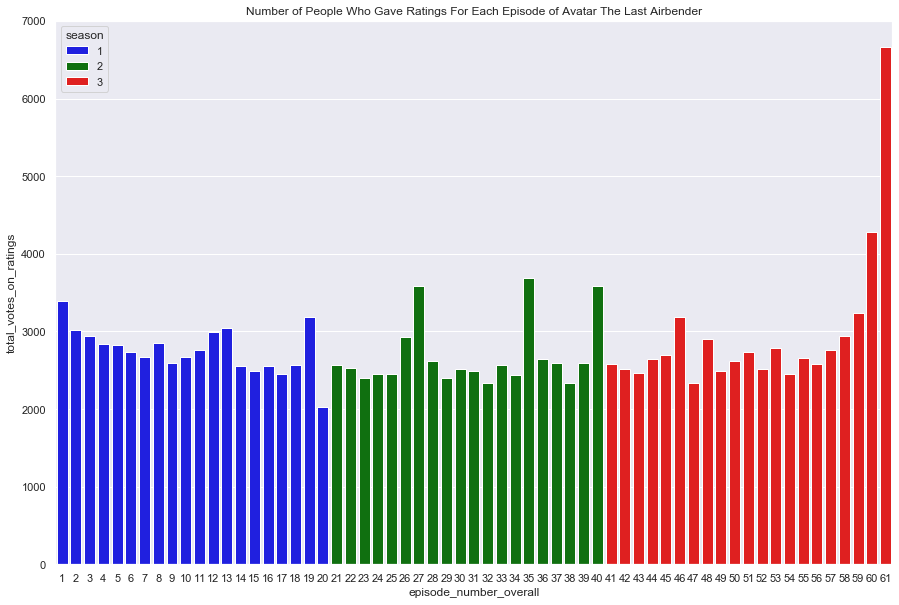

In [4]:
#plot to show the number of people who gave ratings for each episode
plt.figure(figsize = (15, 10))
plt.title("Number of People Who Gave Ratings For Each Episode of Avatar The Last Airbender")
plt.yticks(range(0, 8000, 1000))

g = sns.barplot(x = basic_info.episode_number_overall, y = basic_info.total_votes_on_ratings, 
                hue = basic_info.season, dodge = False, palette = ["blue", "green", "red"])
g

## The graphs and what they mean
The number of ratings for each episode is fairly variable but it is evident that a bulk of the episodes have in between 2000 and 3000 reviews. The histogram in the first cell below shows the distribution of number of ratings of each episodes and confirms this. 

I believe it likely that the episodes that surpass the 3000 threshold are episodes generally considered the best/most popular episodes by fans. Their titles are listed in the second cell below.

In the third cell below, we see a pie chart showing how the episodes with over 3000 ratings were distributed throughout the seasons. Overall, season 3 holds the highest percentage of those, leading me to believe that it is the most popular season overall

Also, obviously, the graph in the cell above show that the series finale had the highest number of ratings by far and as we will see, it also has the highest average rating too

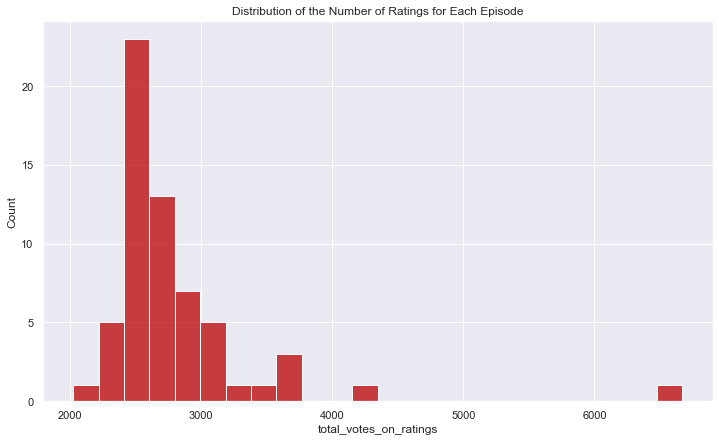

In [13]:
plt.figure(figsize = (12, 7))
plt.title("Distribution of the Number of Ratings for Each Episode")

basic_info.total_votes_on_ratings.describe()
sns.histplot(data = basic_info, x = "total_votes_on_ratings", color = "#BB0000")

In [19]:
basic_info.loc[basic_info.total_votes_on_ratings > 3000].title

0                      The Boy in the Iceberg
1                          The Avatar Returns
12                            The Blue Spirit
18             The Siege of the North, Part 1
26                                 Zuko Alone
34                    The Tales of Ba Sing Se
39                  The Crossroads of Destiny
45               The Avatar and the Fire Lord
58     Sozin's Comet, Part 2: The Old Masters
59    Sozin's Comet, Part 3: Into the Inferno
60         Sozin's Comet, Part 4: Avatar Aang
Name: title, dtype: object

In [9]:
#popular_episodes
lots_of_votes = basic_info.loc[basic_info.total_votes_on_ratings > 3000]
fig = go.Figure(go.Pie(labels = lots_of_votes.season, values = lots_of_votes.total_votes_on_ratings, 
                       hole = 0.4))
fig.update_traces(textinfo = 'label+percent', marker = dict(line = dict(color='#000000', width=1)))
fig.update_layout(title = "Season Distribution of the Episodes With Over 3000 IMDb Ratings")
fig

## Episode ratings vs the number of votes for each rating
The first two cells below shows the correlation coefficient between ratings and the number of votes for each episode.
The first cell considers outliers, the second one doesn't.

Their is an apparent relationship here. Episodes with higher average ratings tended to have more total reviews. It is also interesting to see the massive spike in total reviews as average ratings approach 10. The scatterplots visualizing these relationships are in the third and fourth cells below. The third cell considers outliers, the fourth cell does not

In [28]:
np.corrcoef(basic_info.ratings, basic_info.total_votes_on_ratings)[0][1] #with outliers

0.4642951237617395

In [50]:
sans_outliers = basic_info.loc[(basic_info.total_votes_on_ratings < 6000) & (basic_info.total_votes_on_ratings > 2200)]
np.corrcoef(sans_outliers.ratings, sans_outliers.total_votes_on_ratings)[0][1] # outliers removed (Season 1 and Season 3 finales)
len(sans_outliers)

59

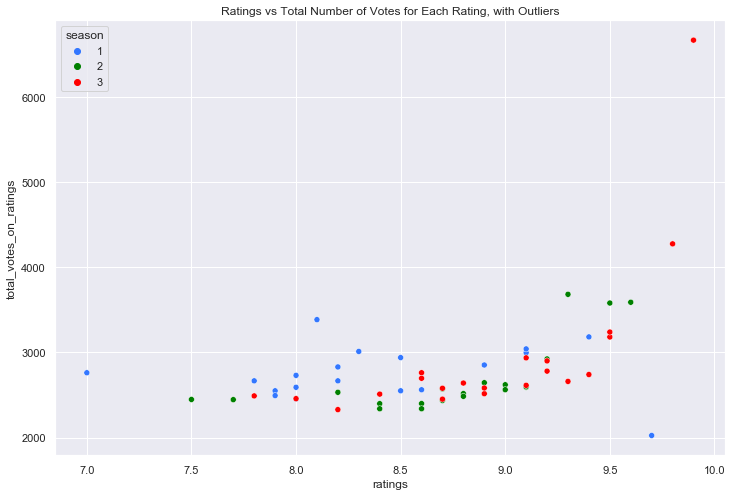

In [52]:
#scatter plot of ratings versus number of votes
plt.figure(figsize = (12, 8))
plt.title("Ratings vs Total Number of Votes for Each Rating, with Outliers")
sns.scatterplot(data = basic_info, x = "ratings", y = basic_info.total_votes_on_ratings, 
                hue = "season", palette = ["#3377FF", "Green", "Red"])

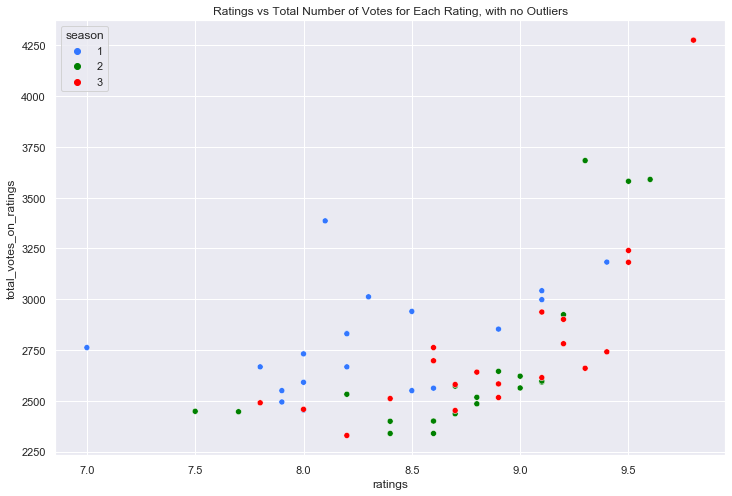

In [53]:
plt.figure(figsize = (12, 8))
plt.title("Ratings vs Total Number of Votes for Each Rating, with no Outliers")
sns.scatterplot(data = sans_outliers, x = "ratings", y = "total_votes_on_ratings", 
                hue = "season", palette = ["#3377FF", "Green", "Red"])

# Exploring the Ratings of the Episodes

After examining total reviews, next thing I wanted to do was analyze the average ratings themselves for each episode. I scraped this data off of IMDb as well. They are what the bulk of the analysis is focused on. I was curious on how people felt about the quality of each episode, and how the various writers, animators, and directors affected those ratings as well.

The first pieces of information below are a basic description of the distribution of the ratings and its corresponding visualization via boxplot. The ratings are firmly centered around the mid-to-upper 8's. It's ever so slightly left skewed and his a relatively small standard deviation.

In [10]:
basic_info.ratings.describe()

count    61.000000
mean      8.690164
std       0.612564
min       7.000000
25%       8.200000
50%       8.700000
75%       9.100000
max       9.900000
Name: ratings, dtype: float64

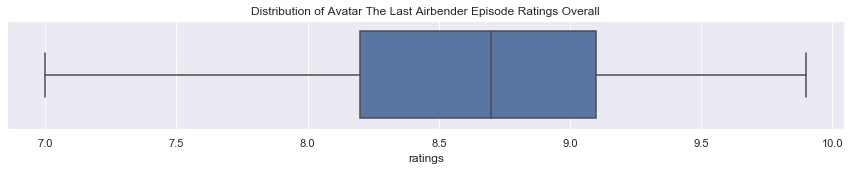

In [6]:
plt.figure(figsize = (15, 2))
plt.title("Distribution of Avatar The Last Airbender Episode Ratings Overall")
plt.yticks(range(0, 11))

g = sns.boxplot(x = basic_info.ratings)

# Ratings over the Seasons
In the first cell below, the ratings of each episode are shown as a bar graph, color coded by season. The bar graph mostly just displays the information calculated in the previous cell but this time it shows the variability in the ratings throughout all episodes.

The graph in the second cell down is almost exactly like the bar graph in the first in terms of what's being shown, but and the region of interest on the y-axis is more focused. In this graph it's more apparent that the rating averages increase with each successive season

In the third below cell, the boxplot fleshes out this relationship clearly. 

> __With each passing season, the average ratings go up__



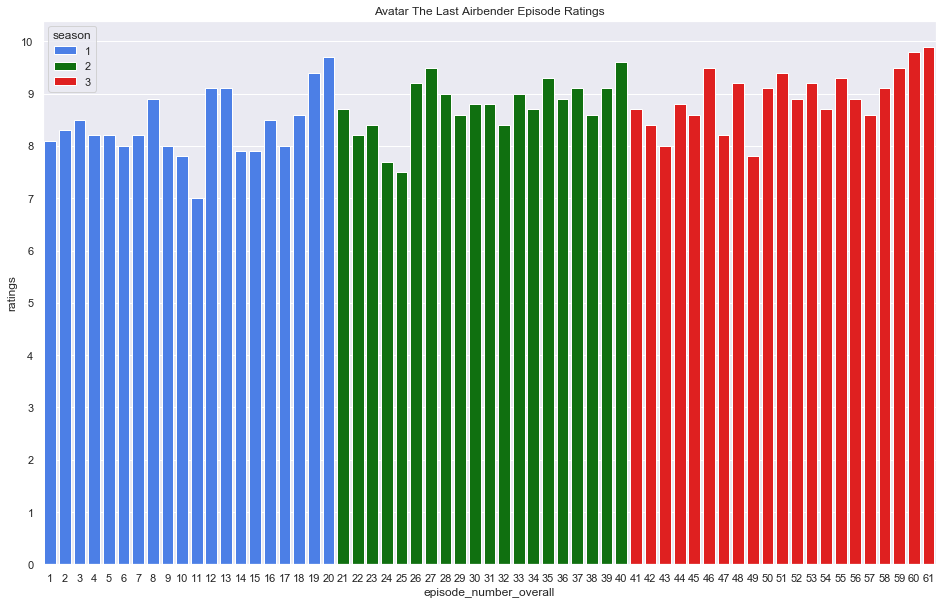

In [3]:
#plot to show show ratings for each episode
plt.figure(figsize = (16, 10))
plt.title("Avatar The Last Airbender Episode Ratings")
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7 ,8, 9, 10])

g = sns.barplot(x = basic_info.episode_number_overall, y = basic_info.ratings, 
            hue = basic_info['season'].astype("str"), palette = ["#3377FF", "Green", "Red"], dodge = False)
g

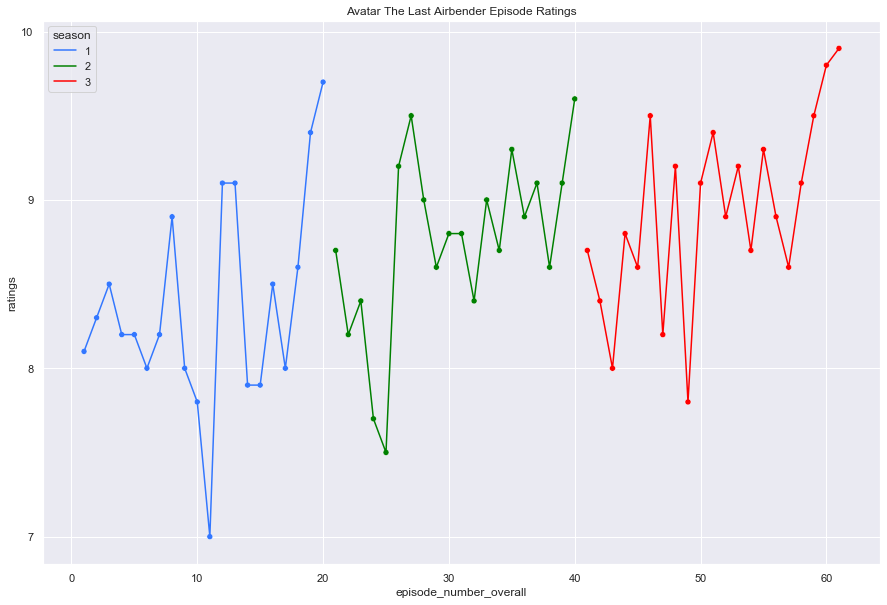

In [9]:
plt.figure(figsize = (15, 10))
plt.title("Avatar The Last Airbender Episode Ratings")
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7 ,8, 9, 10])
sns.lineplot(data = basic_info, x = "episode_number_overall", y = "ratings", hue = "season", palette = ["#3377FF", "green", "red"])
sns.scatterplot(data = basic_info, x = "episode_number_overall", y = "ratings", hue = "season", palette = ["#3377FF", "green", "red"], legend = False)


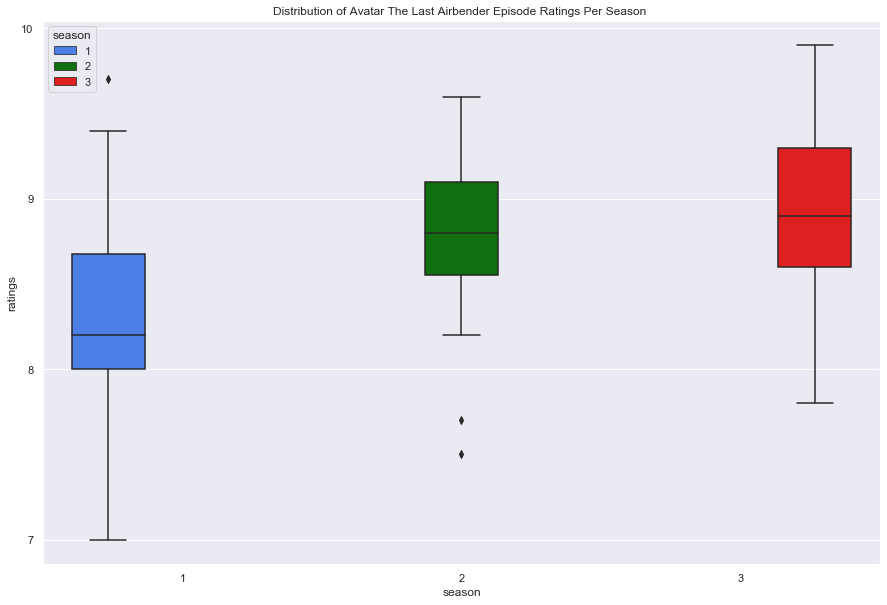

In [5]:
plt.figure(figsize = (15, 10))
plt.title("Distribution of Avatar The Last Airbender Episode Ratings Per Season ")
plt.yticks(range(0, 11))
sns.set_theme(style = "darkgrid")

g = sns.boxplot(x = basic_info.season, y = basic_info.ratings, 
            hue = basic_info['season'].astype("str"), palette = ["#3377FF", "green", "red"])


## Progression of the ratings of each season
The line graph, below shows the ratings of each episode __of that particular season__. 

Most of the graph is clearly a jumbled mess, but a clear relationship forms at the end. The seasons always end with a ratings increases in the last 3-4 episodes. 

> So in other words, ___they didn't slip up once when closing out season___

There is also that season 1 outlier shown by the blue line. We will get to that later 

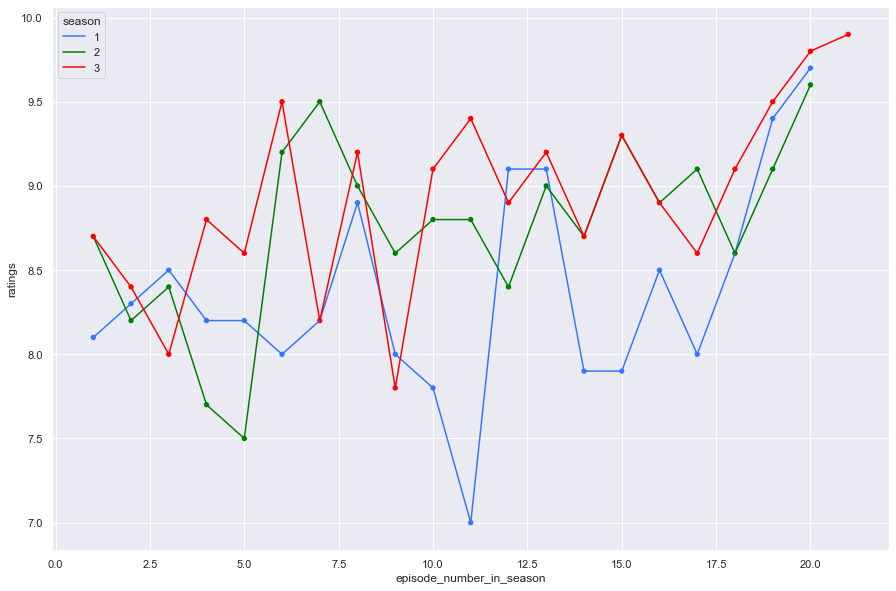

In [10]:
plt.figure(figsize = (15, 10))
#plt.yticks([0, 1, 2, 3, 4, 5, 6, 7 ,8, 9, 10])

sns.lineplot(data = basic_info, x = "episode_number_in_season", y = "ratings", hue = "season", palette = ["#3377FF", "green", "red"])
sns.scatterplot(data = basic_info, x = "episode_number_in_season", y = "ratings", hue = "season", palette = ["#3377FF", "green", "red"], legend = False)


In [55]:
#a bunch of setup
#we won't use the count df's to graph, but they're useful in their own right

#episodes with a rating less than 7.5
trash_ratings = basic_info.loc[basic_info.ratings < 7.5]
trash_count = trash_ratings.season.value_counts().to_frame().reset_index().rename({"season":"number", "index":"season"}, axis = 1)

#episodes with a ratings < 8
subpar_ratings = basic_info.loc[basic_info.ratings < 8]
subpar_count = subpar_ratings.season.value_counts().to_frame().reset_index().rename({"season":"number", "index":"season"}, axis = 1)

#episodes with ratings > 8.5
good_ratings = basic_info.loc[basic_info.ratings > 8.5]
good_count = good_ratings.season.value_counts().to_frame().reset_index().rename({"season":"number", "index":"season"}, axis = 1)

#episodes with ratings > 9.0
great_ratings = basic_info.loc[basic_info.ratings > 9.0]
great_count = great_ratings.season.value_counts().to_frame().reset_index().rename({"season":"number", "index":"season"}, axis = 1)

#episodes with ratings > 9.5
fantastic_ratings = basic_info.loc[basic_info.ratings > 9.5]
fantastic_count = great_ratings.season.value_counts().to_frame().reset_index().rename({"season":"number", "index":"season"}, axis = 1)

# Which episodes are considered good? Bad? Average?

We're gonna go deeper and focus on the episodes themselves, sort out which are good, which are bad, and which are just average. The ratings are sorted as follows

* Fantastic - Greater than 9.5
* Great - Greater than 9
* Good - Greater than 8.5
* Subpar - Less than 8
* Trash - Less than 7.5


## We will focus on the two groups of below average episodes first.
So for episodes that didn't land compared to the others, the plot below shows how many episodes of each season are considered subpar and trash by the criteria listed above. Their ratings are shown as well as their titles and what season the episode is from. Below is the counts for subpar episodes

#### Subpar Episodes
* Season 1: four subpar episodes
* Season 2: two subpar episodes
* Season 3: one subpar episode

For the trash episodes, there is only one: __The Great Divide__, an episode from Season 1, widely regarded as the worst episode in the whole franchise. That was the cause of the massive downward spike in the blue line of the line graph up above

Also on a personal note, I don't believe The Swamp is a subpar episode. It's one of my favorites :(

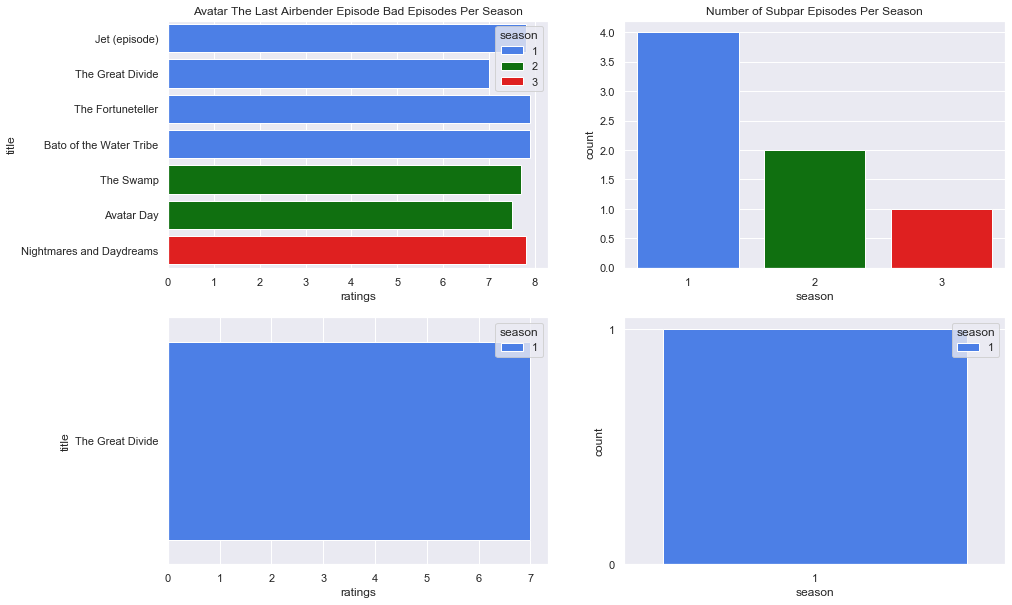

In [56]:
#need to create titles for all subplots
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
axes[0][0].set_title("Avatar The Last Airbender Episode Bad Episodes Per Season")
axes[0][1].set_title("Number of Subpar Episodes Per Season")
plt.sca(axes[1, 1])
plt.yticks([0, 1, 2])

#subpar ratings subplots
sns.barplot(ax = axes[0][0], data = subpar_ratings, x = "ratings", y = "title", hue = "season", 
            orient = "h", dodge = False, palette = ["#3377FF", "green", "red"])
sns.countplot(ax = axes[0][1], data = subpar_ratings, x = "season", palette = ["#3377FF", "green", "red"])

#trash ratings subplots
sns.barplot(ax = axes[1][0], data = trash_ratings, x = "ratings", y = "title", hue = "season", 
            orient = "h", palette = ["#3377FF", "green", "red"])
sns.countplot(ax = axes[1][1], data = trash_ratings, x = "season", 
              hue = "season", palette = ["#3377FF", "green", "red"])

## Now we look through the rest.

__To be clear before we go further:__ There are twenty episodes in season 1, twenty episodes in season 2 and twenty-one episodes in season 3. The numbers below will not add up to that because certain episodes will fit into multiple categories based on how good their rating is. For instance, Zuko Alone (Season 2 Episode 7) has a rating of would fit into the good and great categories but would not fit into the fantastic category as it isn't greater than 9.5 (it's actually exactly 9.5)

### Good Episodes
* Season 1: six good episodes
* Season 2: fifteen good episodes
* Season 3: seventeen good episodes

### Great Episodes
* Season 1: four great episodes
* Season 2: six great episodes
* Season 3: ten great episodes

### Fantastic Episodes
* Season 1: one fantastic episode
* Season 2: one fantastic episode
* Season 3: two fantastic episodes

These graphs consistently show that as the seasons progress, their quality gets higher. Furthermore all of the episodes with fantastic ratings are season finale episodes, once again showing that the show never once flopped on an ending (RIP Game of Thrones, RIP Dexter).

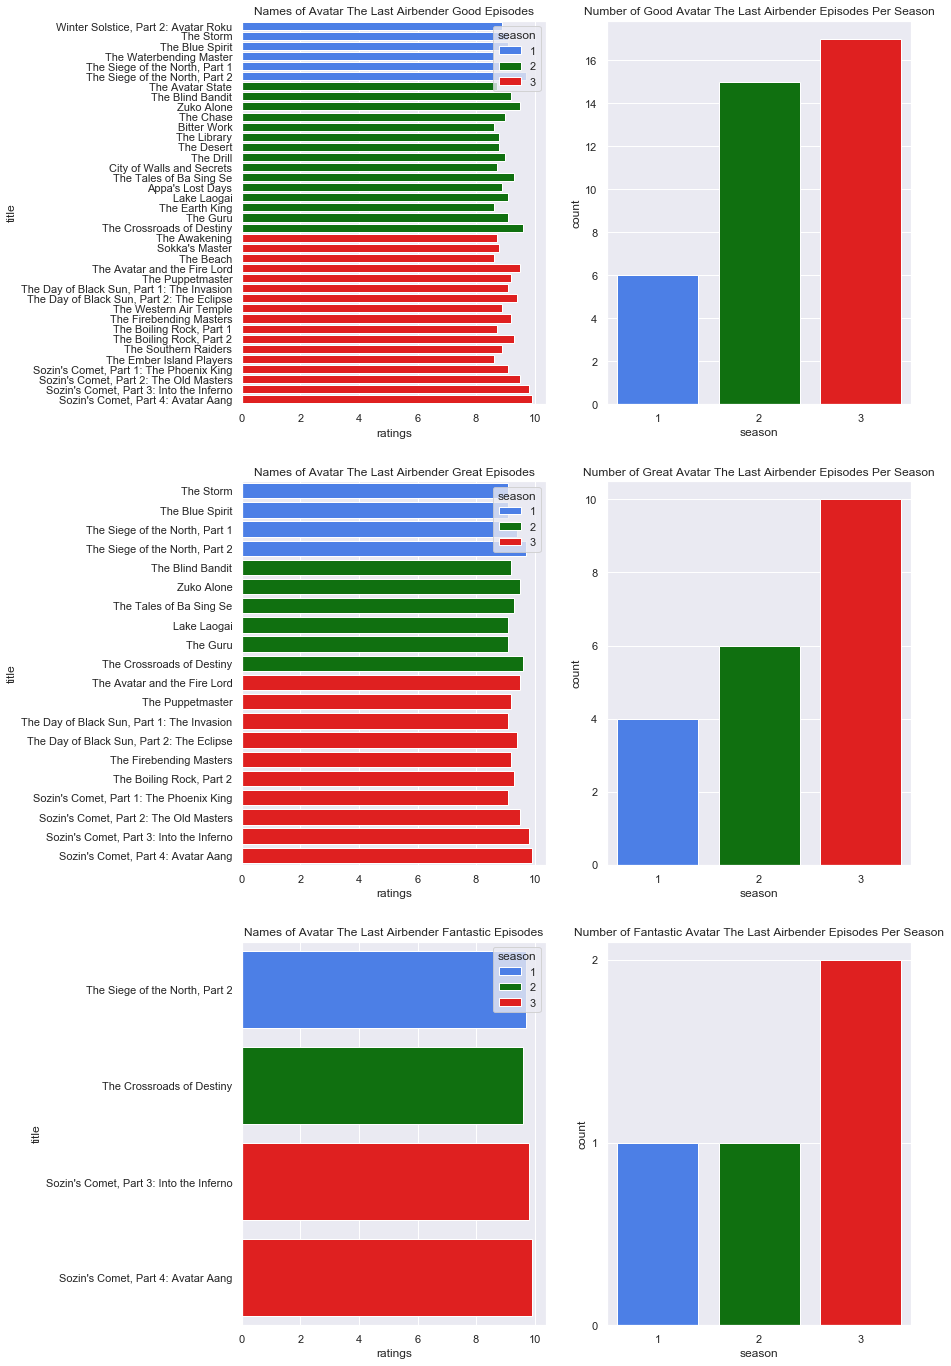

In [57]:
#comparing the good, great, and fantastic episodes of each season of Avatar the Last Airbender
fig, axes = plt.subplots(3, 2, figsize = (12, 24))
axes[0][0].set_title("Names of Avatar The Last Airbender Good Episodes")
axes[0][1].set_title("Number of Good Avatar The Last Airbender Episodes Per Season")
axes[1][0].set_title("Names of Avatar The Last Airbender Great Episodes")
axes[1][1].set_title("Number of Great Avatar The Last Airbender Episodes Per Season")
axes[2][0].set_title("Names of Avatar The Last Airbender Fantastic Episodes")
axes[2][1].set_title("Number of Fantastic Avatar The Last Airbender Episodes Per Season")
plt.sca(axes[2, 1])
plt.yticks([0, 1, 2])

#good ratings subplots
sns.barplot(ax = axes[0][0], data = good_ratings, x = "ratings", y = "title", hue = "season", 
            orient = "h", dodge = False, palette = ["#3377FF", "green", "red"])
sns.countplot(ax = axes[0][1], data = good_ratings, x = "season", palette = ["#3377FF", "green", "red"])

#great ratings subplots
sns.barplot(ax = axes[1][0], data = great_ratings, x = "ratings", y = "title", hue = "season", 
            orient = "h", dodge = False, palette = ["#3377FF", "green", "red"])
sns.countplot(ax = axes[1][1], data = great_ratings, x = "season", palette = ["#3377FF", "green", "red"])

#fantastic ratings subplots
sns.barplot(ax = axes[2][0], x = fantastic_ratings.ratings, y = fantastic_ratings.title, hue = fantastic_ratings.season, 
            orient = "h", dodge = False, palette = ["#3377FF", "green", "red"])
sns.countplot(ax = axes[2][1], data = fantastic_ratings, x = "season", palette = ["#3377FF", "green", "red"])

# Directors and their connection to ratings
Now we're going to start looking at how different directors can impact the ratings of an episode. To do that, we first start off with graphing a plot, showing the different directors and how many episodes they directed.

Immediately it stands out that Giancarlo Volpe dominates the field in terms of quantity of episodes directed, with Ethan Spaulding, Lauren MacMullan, Joaquim Dos Santos and Dave Filoni also directing their fair shares of episodes.

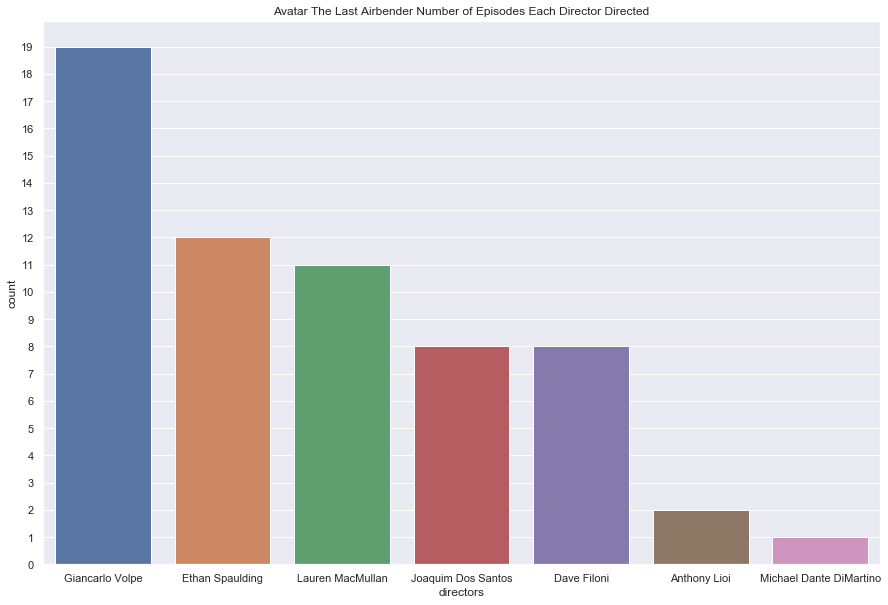

In [64]:
plt.figure(figsize = (15, 10))
plt.yticks(range(0, 20))
plt.title("Avatar The Last Airbender Number of Episodes Each Director Directed")

sns.countplot(data = basic_info, x = "directors", order = basic_info["directors"].value_counts().index)

## Directors by Season

The figure below shows the median ratings of each of the directors split up by season. Some only have one or two bars because they only directed episodes for one or two of the seasons. 

While Michael Dante Dimartino seems to be top dog, but he only directed one episode, the finale of season 2 so it isn't exactly a fair comparsion.

On the other end, Dave Filoni and Anthony Lioi both had comparatively lower average ratings with 8.05 and 8.10 respectively

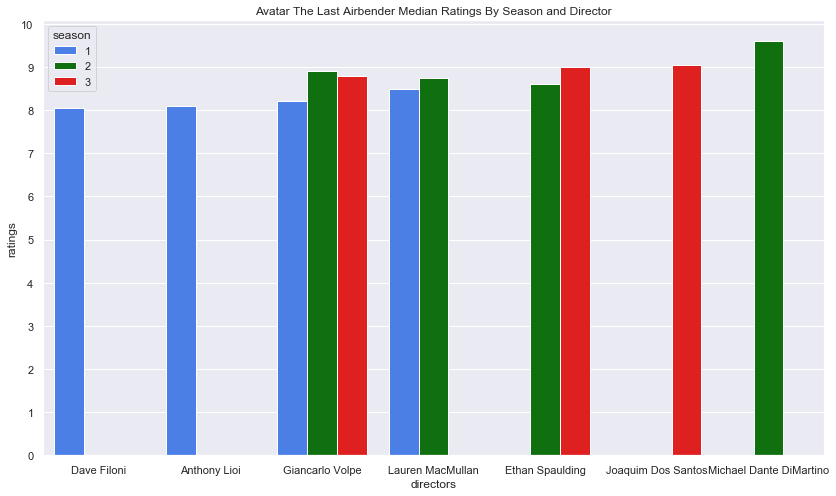

In [24]:
#median ratings of episodes directed by a given director, split up by season

plt.figure(figsize = (14, 8))
plt.title("Avatar The Last Airbender Median Ratings By Season and Director")
plt.yticks(range(0, 11))

directors = basic_info.groupby(["season", "directors"]).ratings.median().to_frame().reset_index()
directors

sns.barplot(data = directors.sort_values(["ratings"]), x = "directors", y = "ratings", 
            hue = "season", palette = ["#3377FF", "green", "red"])

In [34]:
directors.loc[(directors.season == 1) & (directors.directors.isin(["Dave Filoni", "Anthony Lioi"]))]

season     directors  ratings
0       1  Anthony Lioi     8.10
1       1   Dave Filoni     8.05

## When did the directors direct their episodes?

In the figure below, there are three pie charts, one for each season. Each pie chart shows the proportion and number of episodes directed by a given director in that season.

Personally, I was surprised that there was as much of a turnover as their was. Before I started, I had always just kind of thought that there were only one or two directors always running the show, but it turns out there were seven and they passed in and out throughout the seasons. 

For instance
* Dave Filoni only directed episodes in Season 1
* Joaquim Dos Santos only directed episodes in Season 3 (where he did a good job - more on that later)
* Lauren MacMullan never directed anything past Season 2

The directors are responsible for many crucial elements of each episode. Personally I find it incredible that despite the turnover in directors the show still managed to keep a steady vision. 

In [58]:
#plotly pie chart subplot attempt

#first split it all up by season
season_1 = basic_info.loc[basic_info.season == 1]
season_2 = basic_info.loc[basic_info.season == 2]
season_3 = basic_info.loc[basic_info.season == 3]

#season_1.directors.value_counts().index

fig = make_subplots(rows = 1, cols = 3, specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.append_trace(go.Pie(labels = season_1.directors.value_counts().index, 
                     values = season_1.directors.value_counts(), title = "Season 1"), row = 1, col = 1)
fig.append_trace(go.Pie(labels = season_2.directors.value_counts().index, 
                     values = season_2.directors.value_counts(), title = "Season 2"), row = 1, col = 2)
fig.append_trace(go.Pie(labels = season_3.directors.value_counts().index, 
                     values = season_3.directors.value_counts(), title = "Season 3"), row = 1, col = 3)
fig.update_traces(textinfo = "value+percent", pull = 0.05, marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(height = 400, title_text = "Avatar The Last Airbender Director Proportions By Season")

## Writers

Next up we are going to check out the writers. I got information on writers of each episode from Wikipedia. While they generally only credited one to two people per episode, I assumed the people credited for a given episode were the main writers of that episode. Lets dive on in!

What we in the first cell below the number of episodes each writer is credited with writing. 

__What struck me immediately__ was the comparatively few episodes __Bryan Konietzko__ was credited as main writer on. For more context, Avatar: The Last Airbender was created by Michael Dante DiMartino and Bryan Konietzko (Called "Bryke" by the fandom for reasons I cannot fathom) Michael Dante DiMartino was credited on 14 episodes, but Bryan Konietzko was credited on only 7, or half of that. 

Other people who played a major role in the writing of episodes were:
* John O'Bryan (13)
* Aaron Ehasz (10)
* Tim Hedrick (10)
* Elizabeth Welch Ehasz 8)
* Joshua Hamilton (6)

In the second cell below, there is a massive bar chart showing that information in a more visualy appealing context

In [61]:
unique_writer_tags = basic_info.writers.unique()
real_unique_writers = []
for tag in unique_writer_tags:
    new_tag = re.split(' and |,', tag)
    for name in new_tag:
        if name.strip() not in real_unique_writers:
            real_unique_writers.append(name.strip())

writer_df = pd.DataFrame()

for writer in real_unique_writers:
    writer_df[writer] = basic_info.writers.str.contains(writer)
    
#writer_df['Michael Dante DiMartino']

writer_counts_df = pd.DataFrame(columns = ["writer", "writer_count"])
writer_counts = []
for writer in real_unique_writers:
    writer_counts.append(writer_df[writer].value_counts()[True])
    
writer_counts_df["writer"] = real_unique_writers
writer_counts_df["writer_count"] = writer_counts
writer_counts_df.sort_values("writer_count", ascending = True)

writer  writer_count
0   Michael Dante DiMartino            14
3              John O'Bryan            13
8               Tim Hedrick            10
5               Aaron Ehasz            10
9     Elizabeth Welch Ehasz             8
1           Bryan Konietzko             7
10          Joshua Hamilton             6
16            Katie Mattila             2
7                Ian Wilcox             1
6               James Eagan             1
4           Matthew Hubbard             1
2                Nick Malis             1
11            Joann Estoesa             1
12           Lisa Wahlander             1
13           Andrew Huebner             1
14            Gary Scheppke             1
15         Lauren Macmullan             1
17             Justin Ridge             1
18          Giancarlo Volpe             1
19                 May Chan             1
20            Josh Hamilton             1

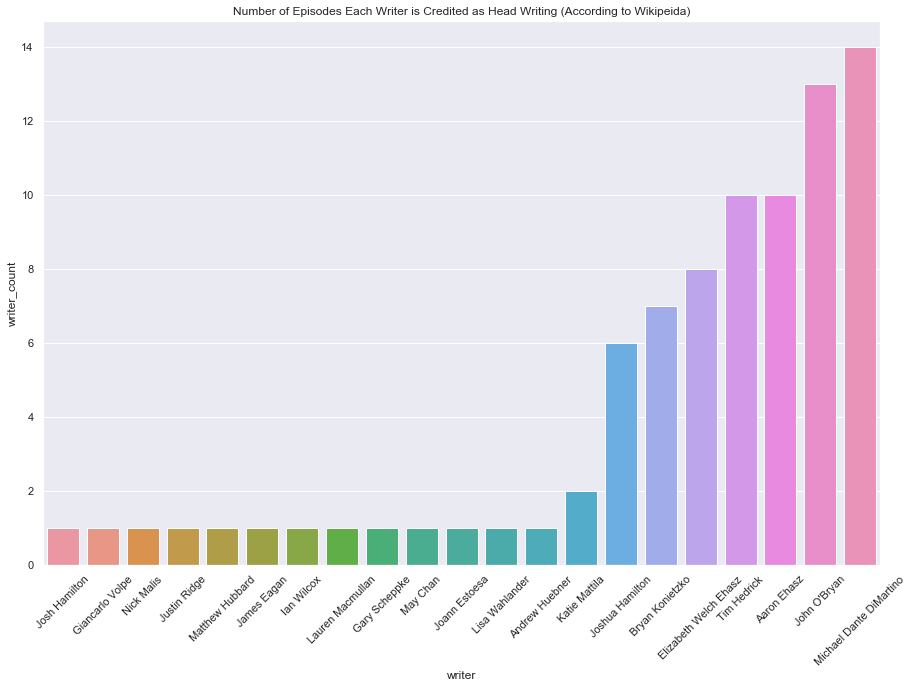

In [66]:
plt.figure(figsize = (15, 10))
plt.title("Number of Episodes Each Writer is Credited as Head Writing (According to Wikipeida)")
plt.xticks(rotation=45)

sns.barplot(data = writer_counts_df.sort_values("writer_count", ascending = True), 
            x = "writer", y = "writer_count")

## Animation Studios

Now we're on to what I consider the most important part of any good cartoon. I had absolutely no knowledge of the animation studios behind the series when I started and I was curious if they would affect the ratings at all. 

The graphs below reveal that there were three animation studios that worked on the series. They were:

* DR Movie
* JM Animation
* Moi Animation


DR Movie animated episodes in seasons 1 and 2. Moi Animation animated episodes in season 3 when DR Movie didn't come back. JM Animation animated episodes in all three seasons as show in the bar graph in the second cell down. 

The bar graph shows the median ratings of each studio by season. Upon inspection, one can see that in seasons 1 and 2, there wasn't really much of a difference in ratings that could be explained by which studio animated the episodes, however in season 3 the median ratings of episodes animated by JM Animation are noticeably higher than the median ratings of the ones directed by Moi Animation. This can be explained by the fact that JM Animation animated three of the four Sozins Comet finale episodes of season 3. The median ratings of JM animation episodes without the finale lowers to 8.9 as calculated in the first cell below.

JM Animation animated the most episodes overall as one would expect given the information that they were the only studio that animated episodes in all three seasons


The pie chart shows that each season was split roughly in half - one half of the episodes animated by one studio and the other half animated by the other.

In [76]:
np.median(basic_info.loc[(basic_info.animation_studio == "JM Animation") & (basic_info.season == 3) & (basic_info.episode_number_overall < 57)].ratings)

8.7

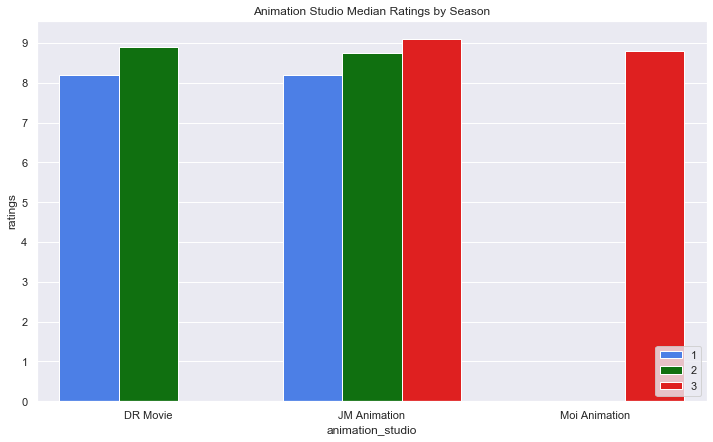

In [28]:
#Animation studios median ratings by season
plt.figure(figsize = (12, 7))
plt.yticks(np.arange(0, 10))
animators = basic_info.groupby(["animation_studio", "season"]).median().ratings.to_frame().reset_index()

sns.barplot(data = animators.sort_values("ratings"), x = "animation_studio", y = "ratings", 
            hue = "season", palette = ["#3377FF", "green", "red"]).set_title("Animation Studio Median Ratings by Season")
plt.legend(loc = 4)

In [26]:
#shows how many episodes each animation studio animated
animator_series = basic_info.animation_studio.value_counts()
fig = go.Figure(data = go.Pie(labels = animator_series.index, values = animator_series, 
                              hole = 0.65, textinfo = 'label+value+percent', textfont_size = 15,
                              marker=dict(line=dict(color='#000000', width=1))))
fig.update_layout(title = "Distribution of Which Studios Animated the Avatar Episodes")
fig

In [70]:
#pie charts showing distribution by season
#first split em up
animators_season_1 = basic_info.loc[basic_info.season == 1]
animators_season_2 = basic_info.loc[basic_info.season == 2]
animators_season_3 = basic_info.loc[basic_info.season == 3]

#do tha thang
fig = make_subplots(rows = 1, cols = 3, specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.append_trace(go.Pie(labels = animators_season_1.animation_studio.value_counts().index, 
                     values = animators_season_1.animation_studio.value_counts(), title = "Season 1"), row = 1, col = 1)
fig.append_trace(go.Pie(labels = animators_season_2.animation_studio.value_counts().index, 
                     values = animators_season_2.animation_studio.value_counts(), title = "Season 2"), row = 1, col = 2)
fig.append_trace(go.Pie(labels = animators_season_3.animation_studio.value_counts().index, 
                     values = animators_season_3.animation_studio.value_counts(), title = "Season 3"), row = 1, col = 3)
fig.update_traces(textinfo = "value+percent", pull = 0.05, marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(height = 400, title_text = "Avatar The Last Airbender Animation Studios Proportions By Season")
fig

## Directors and Animation Studios
Below is a heatmap, showing average episode ratings of a given director/animator combo. The plot below gives a convincing argument that the combination of JM Animation and either Joaquim Dos Santos or Ethan Spaulding lead to the best episodes on average

In [133]:
#creating a grouped table to find the optimal director/animator combo

#grouped animator/director/season
grouped_ads = basic_info.groupby(["animation_studio", "directors", "season"]).ratings.agg([min, max, "mean", len]).reset_index()
grouped_ads = grouped_ads.loc[grouped_ads.directors != "Michael Dante DiMartino"]

#basic_info.loc[(basic_info.directors == "Joaquim Dos Santos") & (basic_info.animation_studio == "JM Animation")]

fig = go.Figure(data = go.Heatmap(x = grouped_ads["animation_studio"], y = grouped_ads["directors"], z = grouped_ads["mean"],
                                 colorscale = "sunset"))
fig

## I know what you're thinking: Where's the rest of it??

It's coming. This is my little pet project and I can only update it when I have the time. Never fear though. I am nowhere close to finished yet. 